In [172]:
import sklearn as sk
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels as stm

In [173]:
X = pd.read_csv('data/preprocessing/X_fill.csv')
y = pd.read_csv('data/preprocessing/y.csv')

In [174]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 34 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   educ_center                                                      1649 non-null   float64
 1   harass5_Does not apply (i do not have a job/superior/co-worker)  1649 non-null   int64  
 2   harass5_No                                                       1649 non-null   int64  
 3   harass5_Yes                                                      1649 non-null   int64  
 4   harass5_unknown                                                  1649 non-null   int64  
 5   polviews_Conservative                                            1649 non-null   int64  
 6   polviews_Extremely liberal                                       1649 non-null   int64  
 7   polviews_Extrmly conservative             

In [175]:
size = y.shape[0]
mu = 0
sigma = 1e-2
noise = np.random.normal(mu,sigma,size)

In [176]:
y['noise'] = y['email_time_center'] + sigma

In [177]:
y[y['noise'] == 0]

,email_time_center,noise


array([[<Axes: title={'center': 'email_time_center'}>,
        <Axes: title={'center': 'noise'}>]], dtype=object)

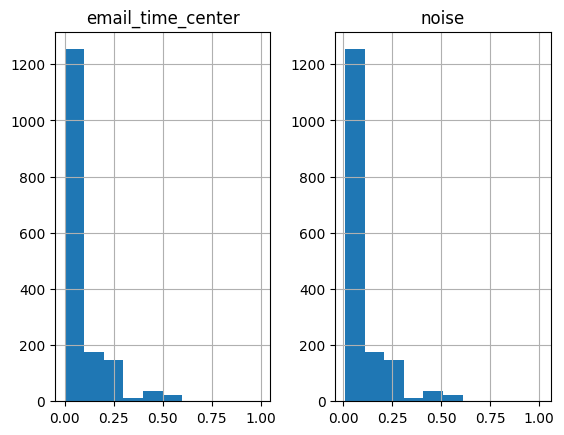

In [178]:
y.hist()

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y['noise'], test_size=0.2, random_state=42)

In [181]:
print(X_train.shape)
print(y_train.shape)

(1319, 34)
(1319,)


In [182]:
# y_train.hist()

In [183]:
link_function = stm.genmod.families.links.Log()
gamma_model = stm.api.GLM(y_train, X_train, family=stm.api.families.Gamma(link=link_function))
gamma_results = gamma_model.fit(method='lbfgs')
gamma_results.summary()

/home/linhnm/msc_code/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/linhnm/msc_code/social-stat-final-term/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  noise   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1291
Model Family:                   Gamma   Df Model:                           27
Link Function:                    Log   Scale:                          2.0615
Method:                         lbfgs   Log-Likelihood:                 2022.6
Date:                Mon, 14 Aug 2023   Deviance:                       1465.8
Time:                        18:01:21   Pearson chi2:                 2.66e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.1089
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
educ_center                                                         1.5806      0.293      5.388      0.000       1.006       2.156
harass5_Does not apply (i do not have a job/superior/co-worker)    -0.7195   7.04e+06  -1.02e-07      1.000   -1.38e+07    1.38e+07
harass5_No                                                         -0.2862   6.98e+06   -4.1e-08      1.000   -1.37e+07    1.37e+07
harass5_Yes                                                        -0.1116   7.06e+06  -1.58e-08      1.000   -1.38e+07    1.38e+07
harass5_unknown                                                    -1.3885   6.84e+06  -2.03e-07      1.000   -1.34e+07    1.34e+07
polviews_Conservative                                              -0.2880        nan        nan        nan         nan         nan
polviews_Extremely liberal                                         -0.3850        nan        nan        nan         nan         nan
polviews_Extrmly conservative                                      -0.7236        nan        nan        nan         nan         nan
polviews_Liberal                                                   -0.3837        nan        nan        nan         nan         nan
polviews_Moderate                                                  -0.2380        nan        nan        nan         nan         nan
polviews_Slghtly conservative                                      -0.3414        nan        nan        nan         nan         nan
polviews_Slightly liberal                                          -0.2247        nan        nan        nan         nan         nan
polviews_unknown                                                    0.0785        nan        nan        nan         nan         nan
advfront_Agree                                                     -0.2765        nan        nan        nan         nan         nan
advfront_Disagree                                                  -0.0923   6.52e+05  -1.41e-07      1.000   -1.28e+06    1.28e+06
advfront_Dont know                                                 -0.6667        nan        nan        nan         nan         nan
advfront_Strongly agree                                            -0.2415        nan        nan        nan         nan         nan
advfront_Strongly disagree                                          0.2720        nan        nan        nan         nan         nan
advfront_unknown                                                   -1.5009        nan        nan        nan         nan         nan
snapchat_No                                                        -0.9080   3.15e+06  -2.88e-07      1.000   -6.17e+06    6.17e+06
snapchat_Yes                                   

In [184]:
choices = ['educ_center', 'wrkstat_Keeping', 'wrkstat_Retired', 'wrkstat_School', 'wrkstat_Working fulltime', 'wrkstat_Working parttime	']
X_train_choice = X_train[X_train.columns.intersection(choices)]
X_test_choice = X_train[X_test.columns.intersection(choices)]

In [185]:
link_function = stm.genmod.families.links.Log()
gm_model = stm.api.GLM(y_train, X_train_choice, family=stm.api.families.Gamma(link=link_function))
gm_res = gm_model.fit(method='lbfgs')
gm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  noise   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1315
Model Family:                   Gamma   Df Model:                            3
Link Function:                    Log   Scale:                          1.8216
Method:                         lbfgs   Log-Likelihood:                 1867.8
Date:                Mon, 14 Aug 2023   Deviance:                       2235.1
Time:                        18:06:13   Pearson chi2:                 2.40e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            -0.2088
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
educ_center                 -3.2867      0.111    -29.490      0.000      -3.505      -3.068
wrkstat_Retired             -0.8517      0.123     -6.917      0.000      -1.093      -0.610
wrkstat_School              -1.1013      0.219     -5.027      0.000      -1.531      -0.672
wrkstat_Working fulltime     0.2344      0.102      2.291      0.022       0.034       0.435
============================================================================================
"""

In [186]:
y_pred = gm_res.predict(X_test_choice)